In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [2]:
poll_data = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

In [3]:
poll_df = pd.read_csv(poll_data)
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 77.9+ KB


In [4]:
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


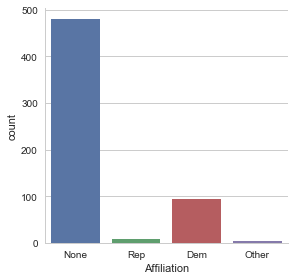

In [5]:
sns.factorplot('Affiliation', data=poll_df, kind='count')

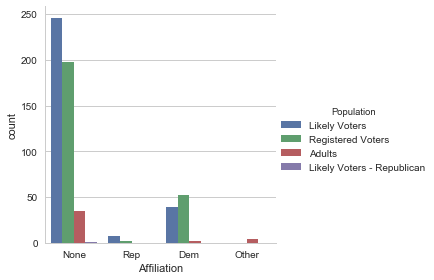

In [6]:
sns.factorplot('Affiliation', data=poll_df, kind='count', hue='Population')

In [7]:
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations', axis=0, inplace=True)

avg

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238
Question Text,NaN
Question Iteration,1.000000


In [8]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)
std

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726
Question Text,NaN
Question Iteration,0.000000


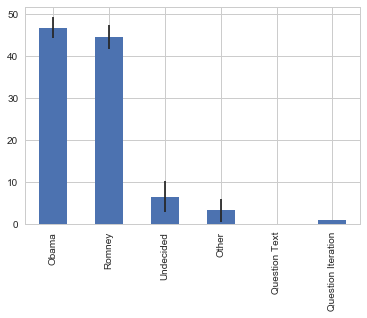

In [9]:
avg.plot(yerr=std, kind='bar', legend=False)

In [10]:
poll_avg = pd.concat([avg,std], axis=1)
poll_avg.columns = ['Avg', 'STD']
poll_avg

,Avg,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726
Question Text,NaN,NaN
Question Iteration,1.000000,0.000000


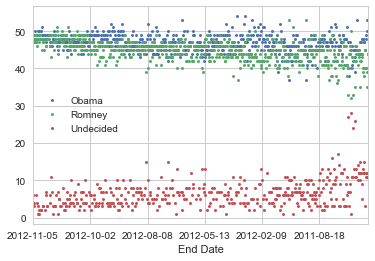

In [11]:
poll_df.plot("End Date", ["Obama", "Romney", "Undecided"], marker='o', markersize=3, linestyle='')

In [12]:
data = DataFrame(poll_df, columns=['Romney', 'Undecided'])
data['Romney'].corr(data['Undecided'])

-0.62255698175816987

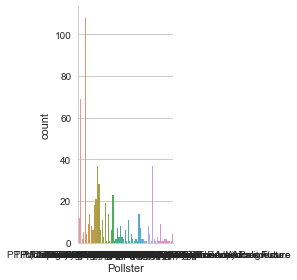

In [13]:
sns.factorplot('Pollster', data=poll_df, kind='count')

In [14]:
poll_df['Difference'] = (poll_df['Obama'] - poll_df['Romney']) /100

poll_df['Difference'].head()

0    0.00
1    0.02
2    0.00
3    0.01
4   -0.01
Name: Difference, dtype: float64

In [15]:
agg_dict = {'Number of Observations': np.sum, 'Obama': np.mean, 'Romney': np.mean, 'Undecided': np.mean,
           'Other': np.sum, 'Question Text': np.sum, 'Question Iteration': np.mean, 'Difference': np.mean}
daily_poll_df = poll_df.groupby(['Start Date'], as_index=False).agg(agg_dict)
daily_poll_df = daily_poll_df.sort_values(['Start Date'], ascending=[1])

daily_poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


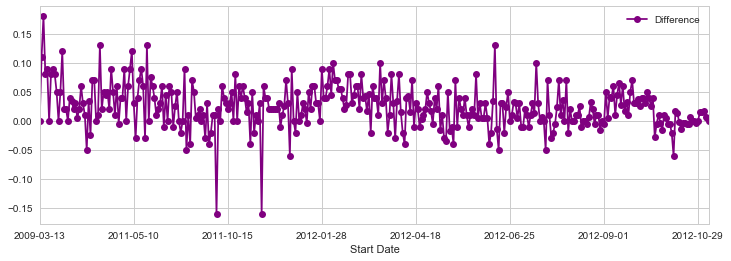

In [16]:
fig = daily_poll_df.plot('Start Date','Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

In [17]:
row_in = 0
xlimit = []

for date in daily_poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in +=1
    else:
        row_in +=1
        
xmin = min(xlimit)
xmax = max(xlimit)

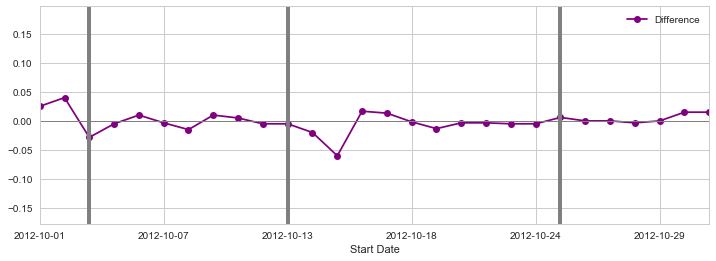

In [18]:
fig = daily_poll_df.plot('Start Date','Difference',figsize=(12,4),
                         marker='o',linestyle='-',color='purple'
                        , xlim=(xmin, xmax))

plt.axvline(x=xmin + 2, linewidth=4, color='grey')
plt.axvline(x=xmin + 10, linewidth=4, color='grey')
plt.axvline(x=xmin + 21, linewidth=4, color='grey')
plt.axhline(y=0, linewidth=1, color='grey')

In [19]:
from zipfile import ZipFile

zipfile = ZipFile("Election_Donor_Data.csv.zip")
donor_df = pd.read_csv(zipfile.open('Election_Donor_Data.csv'),low_memory=False)

In [20]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


In [21]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [22]:
donor_df['contb_receipt_amt'].value_counts()

 100.00        178188
 50.00         137584
 25.00         110345
 250.00         91182
 500.00         57984
 2500.00        49005
 35.00          37237
 1000.00        36494
 10.00          33986
 200.00         27813
 20.00          17565
 15.00          16163
 150.00         14600
 75.00          13647
 201.20         11718
 30.00          11381
 300.00         11204
 20.12           9897
 5.00            9024
 40.00           5007
 2000.00         4128
 55.00           3760
 1500.00         3705
 3.00            3383
 60.00           3084
 400.00          3066
-2500.00         2727
 110.00          2554
 125.00          2520
 19.00           2474
 112.00          2457
 212.00          2182
 5000.00         1679
 11.00           1668
 70.00           1645
 120.00          1600
 375.00          1573
 56.00           1542
 45.00           1473
 225.00          1463
 190.00          1330
 1250.00         1304
 65.00           1252
 115.00          1179
 350.00          1133
 80.00    

In [23]:
don_mean = donor_df['contb_receipt_amt'].mean()
don_std = donor_df['contb_receipt_amt'].std()

print( 'The average donation was %.2f with a std of %.2f' %(don_mean,don_std))

The average donation was 298.24 with a std of 3749.67


In [24]:
top_donor = donor_df['contb_receipt_amt'].copy()
top_donor.sort_values(inplace=True, ascending=False)
top_donor

325136     2014490.51
326651     1944042.43
344539     1679114.65
344419     1511192.17
319478      526246.17
335187      512710.91
257270      451726.00
114754       33300.00
217891       25800.00
823345       25000.00
834301       25000.00
65131        12700.00
41888        10000.00
709859       10000.00
90076        10000.00
99829        10000.00
709268       10000.00
708928       10000.00
710730       10000.00
709813       10000.00
993178       10000.00
708138       10000.00
91145        10000.00
709739       10000.00
708919       10000.00
709608       10000.00
876244       10000.00
710177       10000.00
708898       10000.00
708022       10000.00
711167       10000.00
710198       10000.00
923476       10000.00
90044         9000.00
708114        8000.00
564160        7000.00
34342         5414.31
922061        5200.00
939650        5100.00
710161        5000.00
707580        5000.00
991705        5000.00
999980        5000.00
710150        5000.00
68437         5000.00
707587    

In [39]:
top_donor = top_donor[top_donor>0]

top_donor = top_donor.sort_values(axis=0, ascending=False)

top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

In [40]:
candidates = donor_df.cand_nm.unique()
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [41]:
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [45]:
donor_df = donor_df[donor_df.contb_receipt_amt > 0]
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [49]:
cand_count = donor_df.groupby('cand_nm')['contb_receipt_amt'].count()
cand_count

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

In [50]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()
cand_amount

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

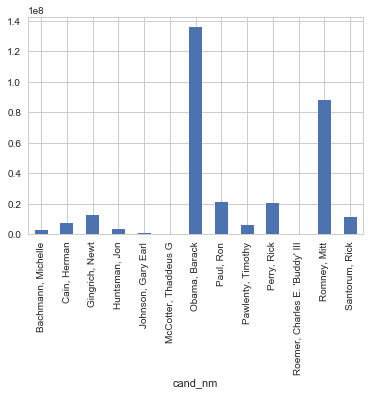

In [51]:
cand_amount.plot(kind='bar')

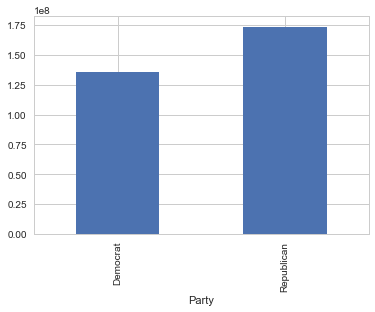

In [52]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

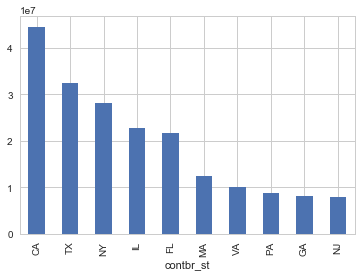

In [57]:
#top 10 donor states
donor_df.groupby('contbr_st')['contb_receipt_amt'].sum().sort_values(axis=0, ascending=False).head(10).plot(kind='bar')

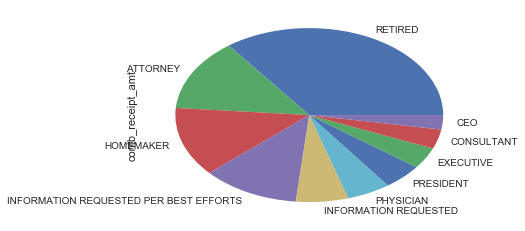

In [61]:
donor_df.groupby('contbr_occupation')['contb_receipt_amt'].sum().sort_values(axis=0, ascending=False).head(10).plot(kind='pie')

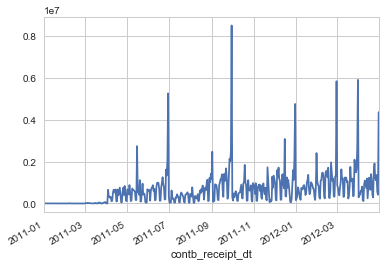

In [72]:
donor_time = donor_df.groupby(pd.to_datetime(donor_df['contb_receipt_dt']))['contb_receipt_amt'].sum()
#donations over time
donor_time.plot(kind='line')